<h1>Распределение Пуассона</h1>

Рассмотрим некоторый поток событий, в котором события наступают независимо друг от друга и с некоторой фиксированной средней интенсивностью λ (событий в единицу времени). Тогда случайная величина X, равная числу событий k, произошедших за фиксированное время, имеет распределение Пуассона. Вероятности вычисляются по следующей формуле: $$P(X=k)=\frac{\lambda^k*e^{-\lambda}}{k!}, \quad где \quad M(X)=\lambda,  D(X)=\lambda$$ 

Для пуассоновской случайной величины математическое ожидание и дисперсия совпадают с интенсивностью потока событий:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math


In [4]:
result = 0
for i in range(5):
    result += ((3 ** i) * (math.exp(1) ** (-3))) / (math.factorial(i))
    
print(1 -result)

0.1847367554762278


In [5]:
math.exp(1)

2.718281828459045

Построим функцию вероятности для распределения Пуассона. Очевидно, что функция вероятности будет выглядеть одинаково для большинства распределений. Она показывает вероятность X принять значение от минут бесконечности до X включительно, то есть мы ищем интеграл от минус бесконечности до нашего X, иначе говоря площадь фигуры под кривой со значениями по оси абцисс от минус бесконечность до x.

Text(0.5, 0, '$x$')

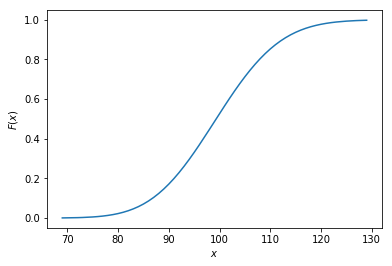

In [6]:
mu = 100
poisson_rv = sts.poisson(mu)
x = poisson_rv.rvs(1000)

cdf = poisson_rv.cdf(x)
plt.plot(sorted(x), sorted(cdf))
plt.ylabel('$F(x)$')
plt.xlabel('$x$')


Посмотрим на гистограмму (насколько часто встречаются в Пуассоновском распределении с параметром лямба = 100 наблюдения) или на распределение плотности Пуассона.

Text(0.5, 0, '$x$')

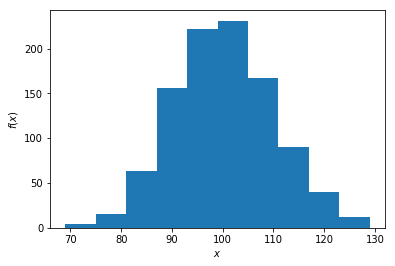

In [7]:
plt.hist(x)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


Функция распределения плотности принимает вид нормального распределения. То есть среднее значение, которое встречается в нашем распределении 100 - это лямбда, которую мы задали, и будет встречаться больше всего раз в нашем распределении.

Поиграемся с различными лямба для теоретической модели и посмотрим на распределения. Как они меняются в зависимости от параметра, который мы передаем в функцию.

Text(0.5, 0, '$x$')

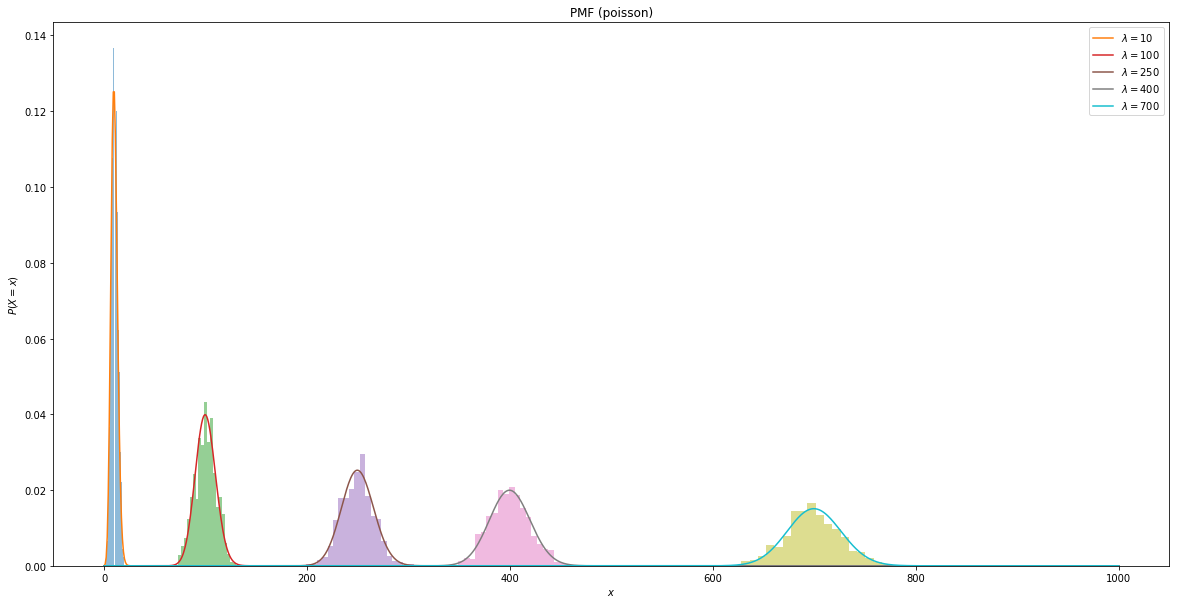

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

for l in [10, 100, 250, 400, 700]:
    rv = sts.poisson(l)
    x = np.linspace(0,1000,1001)
    y = rv.rvs(1000)
    plt.hist(y,  alpha=0.5, density=True, bins=20)
    pmf = rv.pmf(sorted(x))
    plt.plot(sorted(x), pmf, label="$\lambda=%s$" % l)
plt.legend()

plt.title("PMF (poisson)")
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

In [9]:
from ipywidgets import interact, interactive, IntSlider

def changeLambda(mu):
    poisson_rv = sts.poisson(mu)
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    x_frozen = np.arange(sts.poisson.ppf(0.000001, mu), sts.poisson.ppf(0.999999, mu))
    x = poisson_rv.rvs(1000)

    ax.plot(x_frozen, sts.poisson.pmf(x_frozen, mu), lw=5, label='poisson pmf')

    ax.hist(x,  alpha=0.5, density=True,  label='Random sample hist', bins=20)

    plt.xlabel('value')
    plt.ylabel('count')
    plt.ylim(0, 0.3)
    plt.legend(loc='best')
    plt.show()
    
interact(changeLambda, mu=IntSlider(min=0, max=100, step=1, value=5))


interactive(children=(IntSlider(value=5, description='mu'), Output()), _dom_classes=('widget-interact',))

<function __main__.changeLambda(mu)>

Видно, что чем больше значение параметра lambda, тем функция плотности распределения Пуассона более плоская (менее острая). Также можно заметить, что чем больше lambda, то график сильнее превращается в нормальное распределение.

Зафиксируем всё-таки конкретные значения lambda 5, 30, 100. Сгенерируем выборку из 1000 наблюдений Пуассона и построим поверх каждой теоретическое распределение.

В случае с нашим распределением **Пуассона**, математическое ожидание и дисперсия будут зависеть от параметра lambda. Они будут ему равны.

$$ \quad  \displaystyle \textstyle \lambda = 100  \quad  $$ 
$$ \quad  \displaystyle \textstyle M(x) = 100  \quad   $$ 
$$ \quad  \displaystyle \textstyle D(x) = 100  \quad   $$ 

Text(0.5, 0.98, 'Теоретические и реальные данные с параметром (5, 30, 100)')

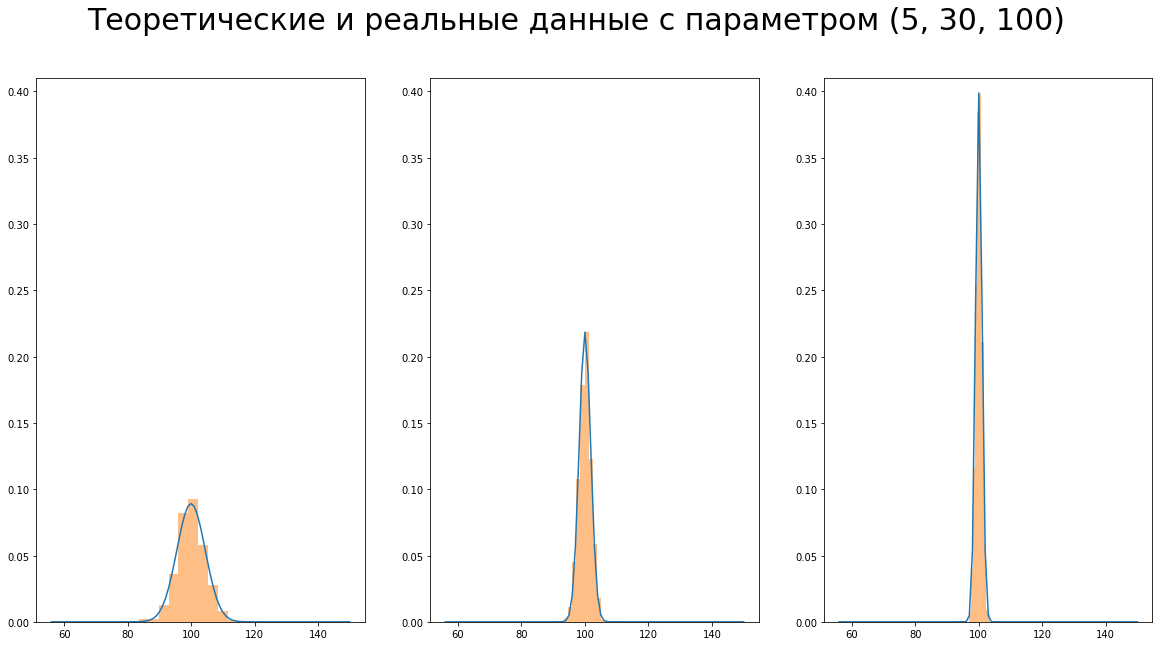

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
poisson_rv = sts.poisson(100)
counter = 0

for l in [5,30,100]:
    result = []
    mu = 100
    sigma = math.sqrt((100 / l))

    norm_rv = sts.norm(loc=mu, scale=sigma)

    x = np.arange(sts.poisson.ppf(0.000001, mu), sts.poisson.ppf(0.999999, mu))

    pdf = norm_rv.pdf(x)
    ax[counter].plot(x, pdf)

    for i in range(1000):
        x = poisson_rv.rvs(l)
        result.append(x.mean())

    ax[counter].hist(result, label="lambda = {}".format(l), alpha=0.5, density=True)
    ax[counter].set_ylim(0, 0.41)
    counter += 1


fig.suptitle('Теоретические и реальные данные с параметром (5, 30, 100)', fontsize=30)


In [11]:
# Сравним посчитаные значения с значениями в библиотеке scipy
mean, var, skew, kurt = sts.poisson.stats(mu=100, moments='mvsk')
print('Среднее распределение Пуассона = {}'.format(mean))
print('Дисперсия распределение Пуассона = {}'.format(var))

Среднее распределение Пуассона = 100.0
Дисперсия распределение Пуассона = 100.0


<h1>Выводы</h1>

Центральная предельная теорема утверждает, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

Следовательно значение средних статистик выборок при увеличении размера выборки будет приближаться к теоретическому значению.
Так при увеличении размера выборки от 5 до 50 точность апроксимации увеличивается и приближается к теретическому значению среднего у распределение Пуассона  0.0

In [12]:
n = 40.

In [13]:
proper = 0.625

In [14]:
proper + 2*math.sqrt(proper*(1-proper)/n)

0.7780931089239487

In [15]:
proper - 2*math.sqrt(proper*(1-proper)/n)

0.4719068910760514

In [704]:
mu = 3

In [707]:
sts.poisson(mu)
sts.poisson.ppf(0.000001, mu)

0.0

In [710]:
rv = sts.poisson(mu)
x = rv.rvs(10)

In [711]:
x

array([4, 0, 1, 4, 2, 6, 2, 3, 3, 2])